# Homework 03 - Programming and critical analysis (ist1102082, ist1103252)


# Exercise 1

Loading the data from the csv file and converting it into a dataframe

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

X = df.drop('quality', axis=1)
y = df['quality']

Perform a Multi Layer Perceptron Regression using the given parameters

In [32]:
# Set the MLPRegressor parameters
activation = "relu"  # Rectified Linear Unit (ReLU) activation
hidden_layer_sizes = (10, 10)  # Two hidden layers with 10 neurons each
validation_fraction = 0.2  # Use 20% of the training data for validation
residuals = []

# Split the dataset into a training and test set with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Perform 10 runs with different random states and collect residuals
for random_state in range(1, 11):
    # Create an MLP Regressor with the specified parameters
    mlp_regressor = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                                 validation_fraction=validation_fraction, random_state=random_state, early_stopping=True)

    # Train the MLP regressor
    mlp_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = mlp_regressor.predict(X_test)

    # Calculate residuals (absolute errors)
    residuals.extend(np.abs(y_test - y_pred))

##### Plot the distribution of residuals using a histogram

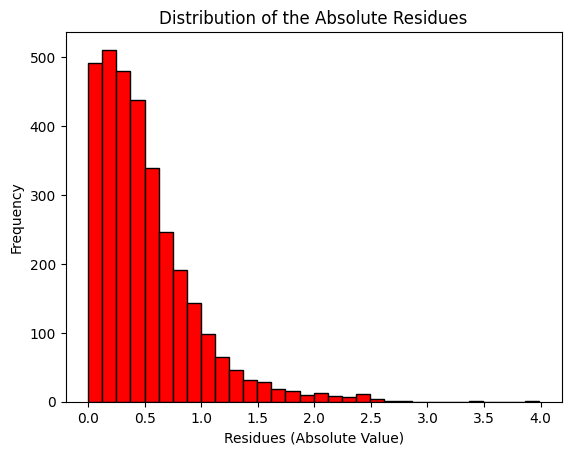

In [33]:
# Plot the distribution of residuals using a histogram
plt.hist(residuals, bins=32, edgecolor='black', color='red')
plt.title("Distribution of the Absolute Residues")
plt.xlabel("Residues (Absolute Value)")
plt.ylabel("Frequency")
plt.show()

# Exercise 2

We will perform the regression again with the same parameters, but we will calculate the MAE (Mean Absolute Error) with and without rounding and bounding. For the bounds we have decided to go within an interval of (5, 6) and we will round to one decimal place.

In [34]:
mae_round_bound = []    # Mean absolute error rounded and bounded
mae = []                # Mean absolute error without rounding and bounding


# Split the dataset into a training and test set with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# Perform 10 runs with different random states and collect residuals
for random_state in range(1, 11):

    # Create an MLP Regressor with the specified parameters
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu",
                                 validation_fraction=0.2, random_state=random_state,
                                 early_stopping=True)

    # Train the MLP regressor
    mlp_regressor.fit(X_train, y_train)

    mae.append(mean_absolute_error(y_test, y_pred))

    # Round and Bound
    round_pred = np.round(y_pred)
    y_pred_round_bound = np.clip(round_pred, 5, 6)
    mae_round_bound.append(mean_absolute_error(y_test, y_pred_round_bound))

    # Make predictions
    y_pred = mlp_regressor.predict(X_test)

    # Calculate residuals (absolute errors)
    residuals.extend(np.abs(y_test - y_pred))

print("Average MAE without rounding and bounding:", np.mean(mae))
print("Average MAE with rounding and bounding: ", np.mean(mae_round_bound))

Average MAE without rounding and bounding: 0.5097171955009515
Average MAE with rounding and bounding:  0.42124999999999996



As we can observe, the MAE is lower when we round and bound the values. By rounding the predictions to the nearest integer, we are now conforming the model's outputs to the problem's requirement. This can lead to more accurate predictions and thus lower MAE because the predictions align with the target variable's nature.Furthermore, bounding the values eliminates outliers that may be present in the data. This can also lead to more accurate predictions and thus lower MAE. 




# Exercise 3 

In [35]:

# Specify the number of iterations (in terms of batches)
num_iterations = [20, 50, 100, 200]

# Initialize lists to store RMSE values for each number of iterations
rmse_values = []

for n_iterations in num_iterations:
    # Perform 10 runs with different random states and assess the impact
    random_states = range(1, 11)
    rmse_iterations = []
    
    # Split the dataset into a training and test set with a fixed seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    for random_state in random_states:
        
        # Create an MLP Regressor with the specified number of iterations
        mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=n_iterations, 
                                     activation=activation ,random_state=random_state)

        # Train the MLP regressor
        mlp_regressor.fit(X_train, y_train)

        # Make predictions
        y_pred = mlp_regressor.predict(X_test)

        # Calculate RMSE
        rmse = np.sqrt(np.mean((y_test-y_pred)**2))
        
        rmse_iterations.append(rmse)

    # Calculate the average RMSE for the current number of iterations
    average_rmse = np.mean(rmse_iterations)
    rmse_values.append(average_rmse)

# Print the RMSE values for different numbers of iterations
for i, n_iterations in enumerate(num_iterations):
    print(f"Average RMSE for {n_iterations} iterations: {rmse_values[i]:.2f}")


Average RMSE for 20 iterations: 1.46
Average RMSE for 50 iterations: 0.89
Average RMSE for 100 iterations: 0.74
Average RMSE for 200 iterations: 0.70


# Exercise 4

A lower RMSE value indicates a better fit of the model to the data, meaning that the model's predictions are closer to the actual values. Following the same logic, a higher RMSE suggests that the model's predictions are further from the actual values, indicating a less accurate model.

By analyzing our results, we can see that the RMSE value is lower when we perform more iterations, meaning that the model is more accurate. This is because the model has more time to learn the patterns in the data, and thus it can make more accurate predictions.

Now, early stopping can definitely impact the performance of the model, in both positive and negative ways.

In the positive side, early stopping can prevent overfitting. Overfitting occurs when the model is too complex, and it starts to memorize the training data, instead of learning the general patterns. This can lead to a model that performs very well on the training data, but it performs poorly on the test data. Early stopping can prevent this from happening, by stopping the training process when the model starts to overfit.

In the negative side, early stopping can prevent the model from reaching its full potential. If the number of iterations set for early stopping is too low, it may lead to underfitting. Early stopping can stop training before the model has fully converged, resulting in a suboptimal solution.